Epoch 1/100


C:\Users\beher\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5215 - loss: 0.6996 - val_accuracy: 0.6931 - val_loss: 0.6424
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6783 - loss: 0.6373 - val_accuracy: 0.7498 - val_loss: 0.5804
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7066 - loss: 0.6011 - val_accuracy: 0.7640 - val_loss: 0.5411
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7234 - loss: 0.5721 - val_accuracy: 0.7711 - val_loss: 0.5123
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7402 - loss: 0.5542 - val_accuracy: 0.7789 - val_loss: 0.5022
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7285 - loss: 0.5690 - val_accuracy: 0.7892 - val_loss: 0.4853
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7481 - loss: 0.5348 - val_accuracy: 0.7963 - val_loss: 0.4781
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7338 - loss: 0.5407 - val_accuracy: 0.8014 - val_loss: 0.

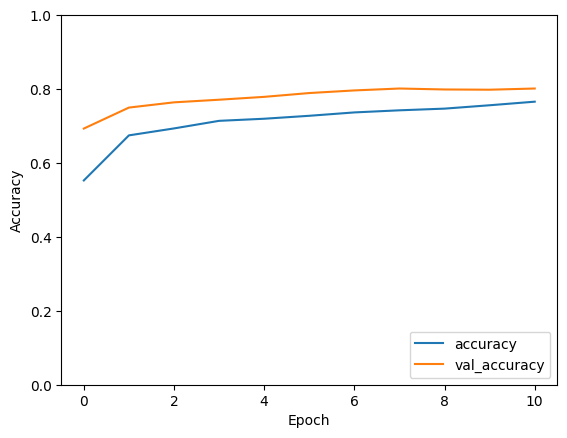

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
True Positive Rate (TPR): 0.8214747736093143
False Positive Rate (FPR): 0.2185089974293059
False Negative Rate (FNR): 0.17852522639068563
True Negative Rate (TNR): 0.781491002570694
Accuracy: 0.8014184397163121
Recall 0.8214747736093143
ROC AUC: 0.8778970192585892
Precision: 0.7888198757763976
F1 Score: 0.8048162230671736
Log Loss: 0.4561246564033509
Confusion Matrix: [[608 170]
 [138 635]]


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score, log_loss, confusion_matrix,recall_score
from tensorflow.keras.callbacks import EarlyStopping

# Load the data
train_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\TRAINING_DATASET.csv")
test_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\TESTING_DATASET.csv")

# Shuffle the data
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target variable
X_train = train_data.drop(columns=["CLASS"])
y_train = train_data["CLASS"]
X_test = test_data.drop(columns=["CLASS"])
y_test = test_data["CLASS"]

# Define categorical and numerical features
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# Preprocessing for numerical features
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numerical_cols])
X_test_numeric = scaler.transform(X_test[numerical_cols])

# Preprocessing for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
X_train_categorical = categorical_transformer.fit_transform(X_train[categorical_cols])
X_test_categorical = categorical_transformer.transform(X_test[categorical_cols])

# Concatenate processed features
X_train_processed = np.concatenate((X_train_numeric, X_train_categorical.toarray()), axis=1)
X_test_processed = np.concatenate((X_test_numeric, X_test_categorical.toarray()), axis=1)

# Define the TensorFlow model with a simpler architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_processed.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1)

# Train the model
history = model.fit(X_train_processed, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test_processed, y_test), callbacks=[early_stopping])

# Save the trained weights
model.save_weights('MLPNN_trained.weights.h5')

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_processed, y_test)
print('Test accuracy:', test_acc)

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Predictions and evaluation metrics
y_pred_proba = model.predict(X_test_processed)
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
TNR = TN / (TN + FP)

print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)
print("True Negative Rate (TNR):", TNR)
print("Accuracy:", accuracy)
print("Recall", recall)
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:", conf_matrix)


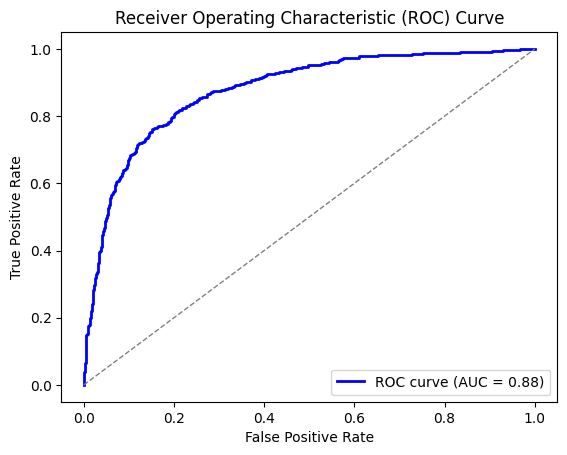

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score, log_loss, confusion_matrix, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix:
[[608 170]
 [138 635]]


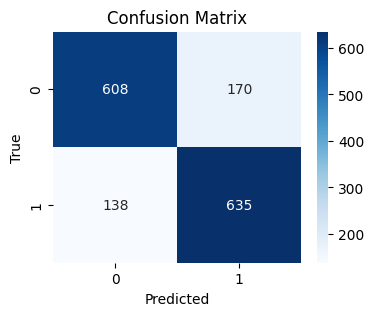

In [5]:
import seaborn as sns
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4, 3))  # Adjust the figsize as needed
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the new CSV dataset
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\NEW_TESTING.csv")

# Separate features
X_new = new_data  # Assuming no target variable

# Apply the same preprocessing steps as before

# Preprocessing for numerical features
X_new_numeric = scaler.transform(X_new[numerical_cols])

# Preprocessing for categorical features
X_new_categorical = categorical_transformer.transform(X_new[categorical_cols])

# Concatenate processed features
X_new_processed = np.concatenate((X_new_numeric, X_new_categorical.toarray()), axis=1)

# Predict probabilities for the new dataset
y_new_pred_proba = model.predict(X_new_processed)

# Probabilities for class 1 (assuming it's a binary classification problem)
class_1_probabilities = y_new_pred_proba.flatten()

# Probabilities for class 0
class_0_probabilities = 1 - class_1_probabilities

# Add the predicted probabilities as new columns to the new dataset
new_data['Predicted_Probability_Class_0'] = class_0_probabilities
new_data['Predicted_Probability_Class_1'] = class_1_probabilities

# # Save the new dataset with predicted probabilities to a new CSV file
# new_data.to_csv("path_to_save_new_dataset_with_probabilities.csv", index=False)


24384/24384 ━━━━━━━━━━━━━━━━━━━━ 24s 954us/step


In [6]:
new_data.to_csv(r"C:\Users\beher\again\mlpnnlulc3_predicted_probs.csv", index=False)

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the new CSV dataset
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\ls_merge_data.csv")

# Separate features
X_new = new_data  # Assuming no target variable

# Apply the same preprocessing steps as before

# Preprocessing for numerical features
X_new_numeric = scaler.transform(X_new[numerical_cols])

# Preprocessing for categorical features
X_new_categorical = categorical_transformer.transform(X_new[categorical_cols])

# Concatenate processed features
X_new_processed = np.concatenate((X_new_numeric, X_new_categorical.toarray()), axis=1)

# Predict probabilities for the new dataset
y_new_pred_proba = model.predict(X_new_processed)

# Probabilities for class 1 (assuming it's a binary classification problem)
class_1_probabilities = y_new_pred_proba.flatten()

# Probabilities for class 0
class_0_probabilities = 1 - class_1_probabilities

# Add the predicted probabilities as new columns to the new dataset
new_data['Predicted_Probability_Class_0'] = class_0_probabilities
new_data['Predicted_Probability_Class_1'] = class_1_probabilities

new_data.to_csv(r"C:\Users\beher\again\mlpnn_ls_lulc3_predicted_probs.csv", index=False)


104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


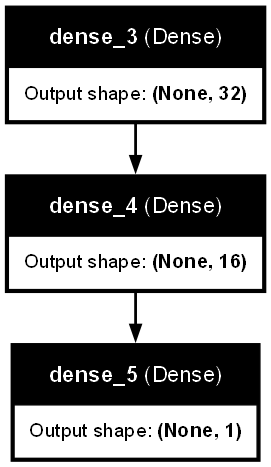

In [7]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your constructed CNN model
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True, dpi=100)


In [8]:
# Assuming `model` is your constructed CNN model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,933 (34.90 KB)

 Trainable params: 2,977 (11.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,956 (23.27 KB)